# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/6bfe451be8ad7abced396241683a69ba88103e019d15e945a56d0d05.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Southern South America (i.e. Falkland islands, Chile, Argentina)** (replace **Cambridge, Massachusetts, United States**), and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

# leaflet_plot_stations(400,'6bfe451be8ad7abced396241683a69ba88103e019d15e945a56d0d05')
leaflet_plot_stations(18,'1e320566a104023b4871eb4e7b26138c79b65e4826a4e12540b49a0e')

C:\Users\hdeng8\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
# Exploratory data analysis
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d18/1e320566a104023b4871eb4e7b26138c79b65e4826a4e12540b49a0e.csv')

print(df.head(5))

print(df.describe())

# #df[['Date', 'Element', 'Data_Value']]
# df = pd.pivot_table(df, index=['Date'], columns=['Element'], values= 'Data_Value')
# df = df.groupby('Date').agg({'TMAX': 'max', 'TMIN': 'min'})
# df = df.reset_index()
# df['Year'] = df['Date'].apply(lambda d: d[:4])
# df['Month-Day'] = df['Date'].apply(lambda d: d[5:])
# df = df[df['Month-Day'] != '02-29']
# df['TMAX'] = df['TMAX'].fillna(limit=2, method='ffill')
# df['TMIN'] = df['TMIN'].fillna(limit=2, method='ffill')
# df10_rec = df.loc[df['Year'] != str(2015)].groupby('Month-Day').agg({'TMAX': 'max', 'TMIN': 'min'}).reset_index()
# df2015 = df[df['Year'] == str(2015)].reset_index()

# df = df[df['Year'] == str(2005)]

# df.tail(50)

# fig, ax = plt.subplots(figsize=(16,8))
# #df.Date
# ax.plot(df['Date'], df['TMAX'], c='red', linewidth=0.5)
# ax.plot(df['Date'], df['TMIN'], c='darkblue', linewidth=0.5)
# ax.fill_between(df['Date'], df['TMIN'], df['TMAX'], alpha=0.3, fc='orange')
# ax.xaxis.set_major_locator(plt.MaxNLocator(20))
# ax.xaxis.set_tick_params(rotation=45)
# ax.set_xlim(left=df['Date'].iloc[0], right=df['Date'].iloc[-1])
# plt.show()
# df.head(50)

# # conditions = [
# #     (df['one'] >= df['two']) & (df['one'] <= df['three']), 
# #     df['one'] < df['two']]

# # choices = [df['one'], df['two']]
# #df2015['10 Year TMAX'] = df10_rec['TMAX']
# #df2015['10 Year TMIN'] = df10_rec['TMIN']
# df2015['Extreme High'] = np.where(df2015['TMAX'] > df10_rec['TMAX'], df2015['TMAX'], np.nan)
# df2015['Extreme Low'] = np.where(df2015['TMIN'] < df10_rec['TMIN'], df2015['TMIN'], np.nan)
# #df2015_extreme.head
# df2015['Date Equivalent'] = str(2005)+'-'+df2015['Month-Day']
# df2015

            ID        Date Element  Data_Value
0  AR000087925  2009-03-08    TMIN          48
1  ARM00087641  2008-06-22    TMAX         113
2  ARM00087641  2015-11-16    TMIN         160
3  ARM00087641  2015-11-16    TMAX         281
4  ARM00087938  2011-04-17    TMAX         111
          Data_Value
count  110206.000000
mean      101.183874
std        92.790726
min      -216.000000
25%        32.000000
50%        90.000000
75%       159.000000
max       427.000000


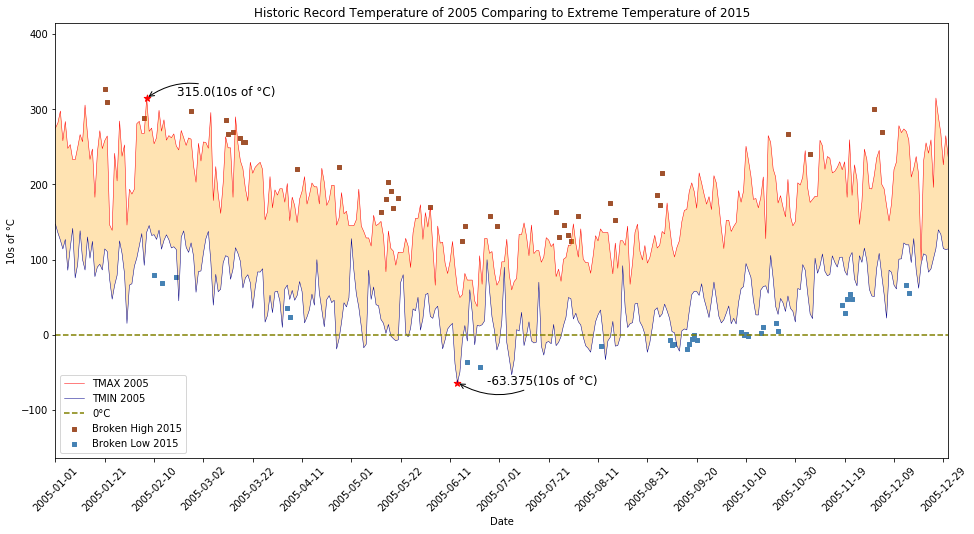

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d18/1e320566a104023b4871eb4e7b26138c79b65e4826a4e12540b49a0e.csv')

# define function to plot customized line graph
def record_temp_plt(df, year1 = 2005, year2 = 2015, save=False):
    """
    The dataframe input should have a standard format of 4 columns, 1 - ID, 2 - Date, 3 - Element (2 Category: TMIN, 
    TMAX), 4 - Data_Value
    year1: historic data of temperature
    year2: current year data to be compare
    """
    # preprocess dataframe
    df = pd.pivot_table(df, index=['Date'], columns=['Element'], values= 'Data_Value')
    df = df.groupby('Date').agg({'TMAX': 'max', 'TMIN': 'min'})
    df = df.reset_index() # reset index to release date
    df['Year'] = df['Date'].apply(lambda d: d[:4])
    df['Month-Day'] = df['Date'].apply(lambda d: d[5:])
    df = df[df['Month-Day'] != '02-29'] # remove leap days
    df['TMAX'] = df['TMAX'].fillna(limit=2, method='ffill') # fill in nan
    df['TMIN'] = df['TMIN'].fillna(limit=2, method='ffill') # fill in nan
    
    df10_rec = df.loc[df['Year'] != str(2015)].groupby('Month-Day').agg({'TMAX': 'max', 'TMIN': 'min'}).reset_index()
    df2 = df[df['Year'] == str(year2)].reset_index() # select year2 comparison data
    df = df[df['Year'] == str(year1)] # select year dataframe
    df2['Extreme High'] = np.where(df2['TMAX'] > df10_rec['TMAX'], df2['TMAX'], np.nan)
    df2['Extreme Low'] = np.where(df2['TMIN'] < df10_rec['TMIN'], df2['TMIN'], np.nan)
    df2['Date Equivalent'] = str(year1)+'-'+df2['Month-Day']
    # Figure
    fig, ax = plt.subplots(figsize=(16,8))
    
    # plot
    ax.plot(df['Date'], df['TMAX'], c='red', linewidth=0.5)
    ax.plot(df['Date'], df['TMIN'], c='darkblue', linewidth=0.5)

    
    # overlay year2 scatter plot
    ax.scatter(df2['Date Equivalent'], df2['Extreme High'], color='sienna', s=10, marker='s')
    ax.scatter(df2['Date Equivalent'], df2['Extreme Low'], color='steelblue', s=10, marker='s')
    
    # overlay extreme temperature in year1
    ax.scatter(df.loc[df.TMAX.idxmax(), 'Date'], df.loc[df.TMAX.idxmax(), 'TMAX'], color='r', s=48, marker='*')
    ax.annotate(str(df.loc[df.TMAX.idxmax(), 'TMAX'])+'(10s of °C)', 
                xy=(df.loc[df.TMAX.idxmax(), 'Date'],df.loc[df.TMAX.idxmax(), 'TMAX']),xycoords='data',
                xytext=(+30, +2), textcoords='offset points', fontsize=12, 
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.3"));
    ax.scatter(df.loc[df.TMIN.idxmin(), 'Date'], df.loc[df.TMIN.idxmin(), 'TMIN'], color='r', s=48, marker='*')    
    ax.annotate(str(df.loc[df.TMIN.idxmin(), 'TMIN'])+'(10s of °C)', 
                xy=(df.loc[df.TMIN.idxmin(), 'Date'],df.loc[df.TMIN.idxmin(), 'TMIN']),xycoords='data',
                xytext=(+30, -2), textcoords='offset points', fontsize=12, 
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.3"));
    
    # improve fig layout
    ax.set_title(r'Historic Record Temperature of '+str(year1)+' Comparing to Extreme Temperature of '+str(year2))
    ax.set_xlabel('Date')
    ax.set_ylabel('10s of °C')
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlim(left=df['Date'].iloc[0], right=df['Date'].iloc[-1])
    ax.axhline(0, xmin=df['Date'].iloc[0], xmax=df['Date'].iloc[-1], linestyle='--', color='olive')
    ax.set_ylim(bottom=df['TMIN'].min()-100, top=df['TMAX'].max()+100)
    ax.legend(['TMAX 2005', 'TMIN 2005', '0°C', "Broken High 2015", 'Broken Low 2015'])
    ax.fill_between(df['Date'], df['TMIN'], df['TMAX'], alpha=0.3, fc='orange')
    

    # final plot and save
    plt.show()
    
    # save the fig
    if save:
        fig.savefig('asignment2.png')

record_temp_plt(df)    